### Visualization
In this notebook, I will try to visualize the major words that are found in Trudeau's speeches.
I will attempt the following:

* Histogram of all positive and negative scores
* Possible visualization of sentiment scores as function of time
* Length of text histogram
* Top words/bigrams/trigrams

Link to possible visualizations: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [1]:
# Importing libraries
from pymongo import MongoClient
from bson.objectid import ObjectId
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from datetime import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]

Let's now collect and view the speeches. The general schema of each document that was inputted that was inputted into the database is: 
* ID: Unique ID for each speech
* title
* date
* details: contains the full speech
* compound score, neg_score, neutral_score, pos_score: sentiment scores from VaderSentimentAnalyzer
* bigrams, tokens, trigrams: tokens and ngrams for each speech

In [4]:
# Gathering the data
client = MongoClient("localhost")

db = client.trudeau_speeches
speeches = db.db_speeches

In [4]:
# Getting list of speech IDs:
for speech in speeches.find():
    print(speech['_id'])

5d23e5bee09f469dac0ffb1b
5d23e5bee09f469dac0ffb1c
5d23e5bee09f469dac0ffb1d
5d23e5bee09f469dac0ffb1e
5d23e5bee09f469dac0ffb1f
5d23e5bee09f469dac0ffb20
5d23e5bee09f469dac0ffb21
5d23e5bee09f469dac0ffb22
5d23e5bee09f469dac0ffb23
5d23e5bee09f469dac0ffb24
5d23e6f96b59476a9d0af74d
5d23e6f96b59476a9d0af74e
5d23e6f96b59476a9d0af74f
5d23e6f96b59476a9d0af750
5d23e6f96b59476a9d0af751
5d23e6f96b59476a9d0af752
5d23e6f96b59476a9d0af753
5d23e6f96b59476a9d0af754
5d23e6f96b59476a9d0af755
5d23e6f96b59476a9d0af756
5d267d57d54ba8be97d93bd2
5d267d57d54ba8be97d93bd3
5d267d57d54ba8be97d93bd4
5d267d57d54ba8be97d93bd5
5d267d57d54ba8be97d93bd6
5d267d57d54ba8be97d93bd7
5d267d57d54ba8be97d93bd8
5d267d57d54ba8be97d93bd9
5d267d57d54ba8be97d93bda
5d267d57d54ba8be97d93bdb
5d267d68ae64cd61e9d63548
5d267d68ae64cd61e9d63549
5d267d68ae64cd61e9d6354a
5d267d68ae64cd61e9d6354b
5d267d68ae64cd61e9d6354c
5d267d68ae64cd61e9d6354d
5d267d68ae64cd61e9d6354e
5d267d68ae64cd61e9d6354f
5d267d68ae64cd61e9d63550
5d267d68ae64cd61e9d63551


In [5]:
# Function to generate wordcloud
def generate_wordcloud(id):
    speech = speeches.find_one({'_id': ObjectId(id)})
    text = str(speech['details'])
    
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 

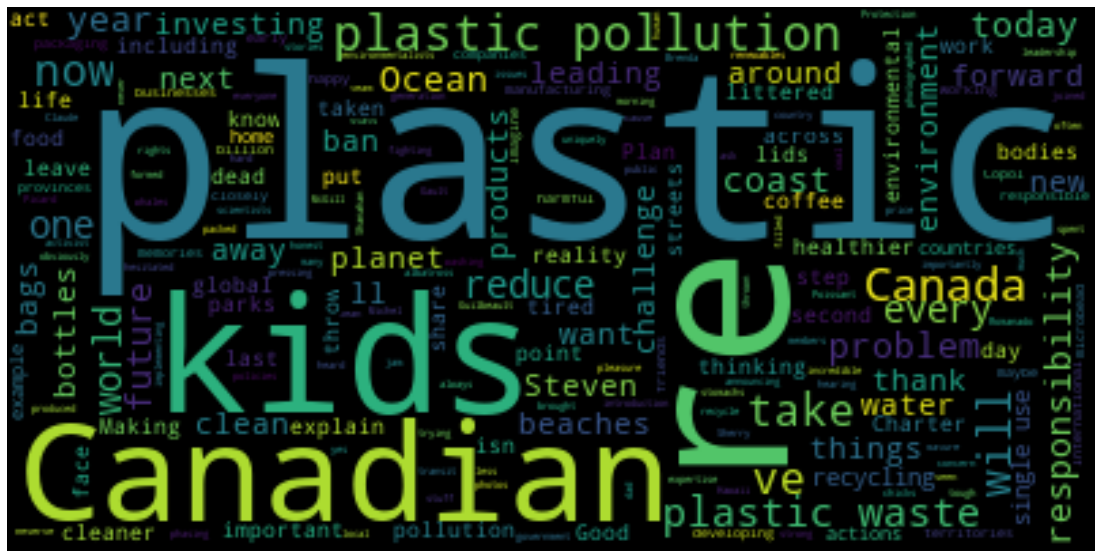

In [6]:
generate_wordcloud('5d23e5bee09f469dac0ffb1b')

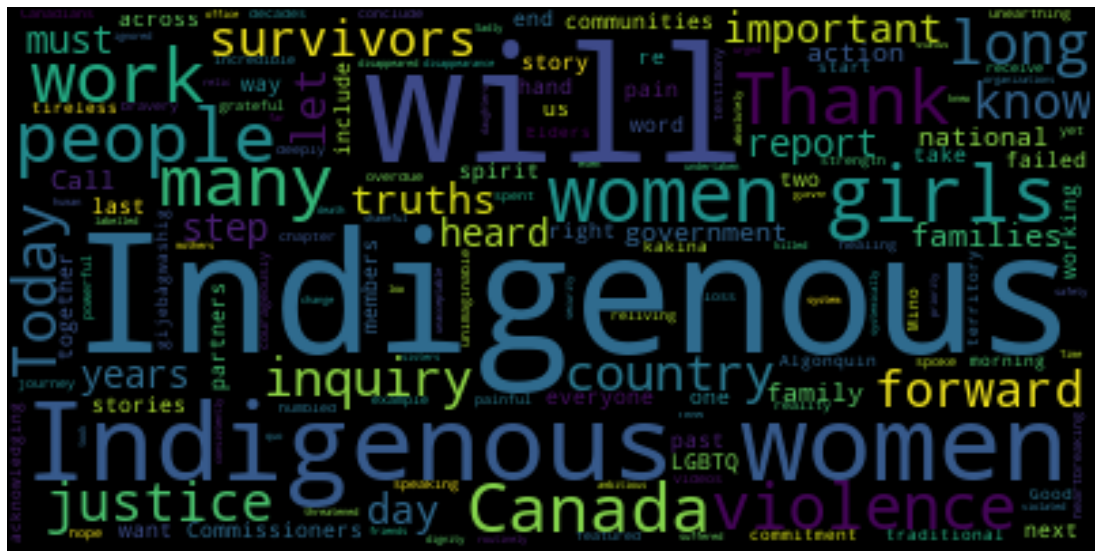

In [7]:
generate_wordcloud('5d23e5bee09f469dac0ffb1c')

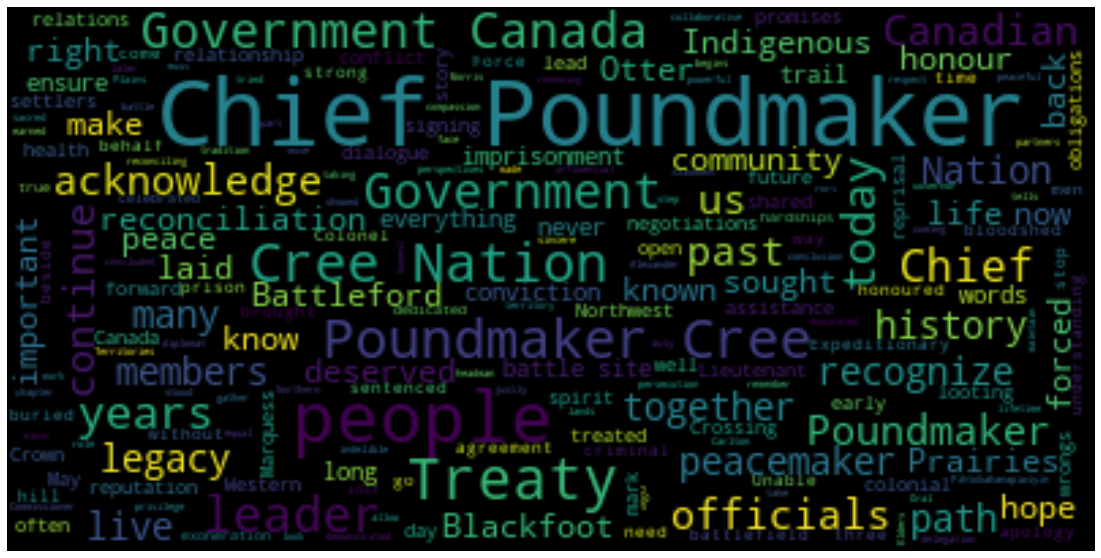

In [8]:
generate_wordcloud('5d23e5bee09f469dac0ffb1d')

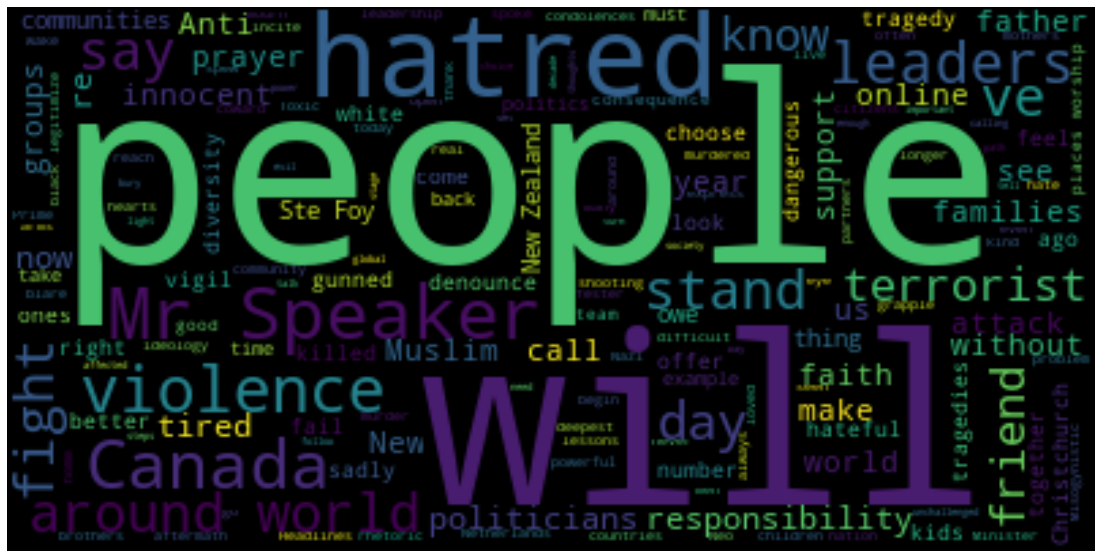

In [9]:
generate_wordcloud('5d23e5bee09f469dac0ffb1e')

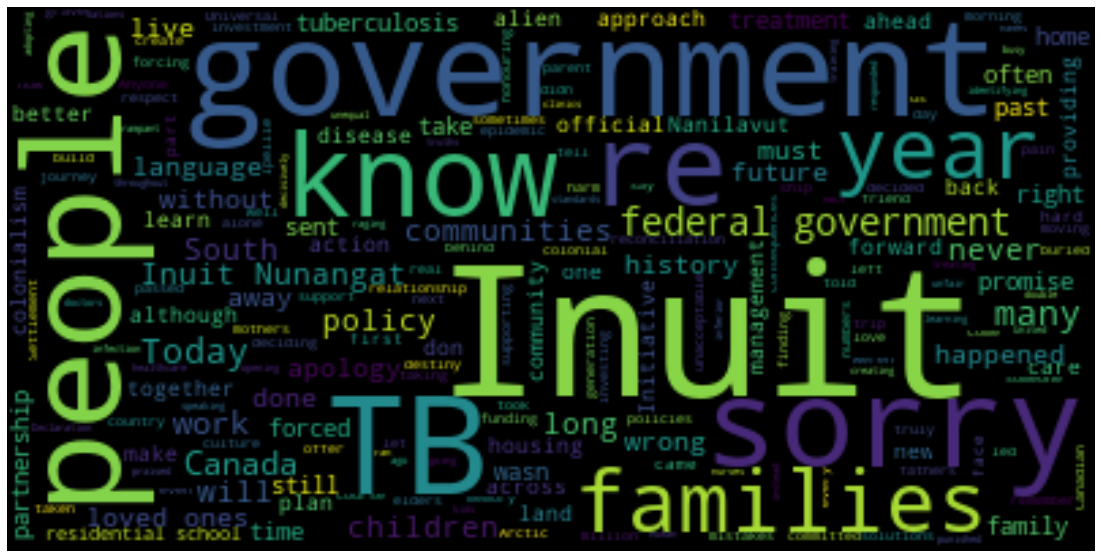

In [10]:
generate_wordcloud('5d23e5bee09f469dac0ffb1f')

(-0.5, 399.5, 199.5, -0.5)

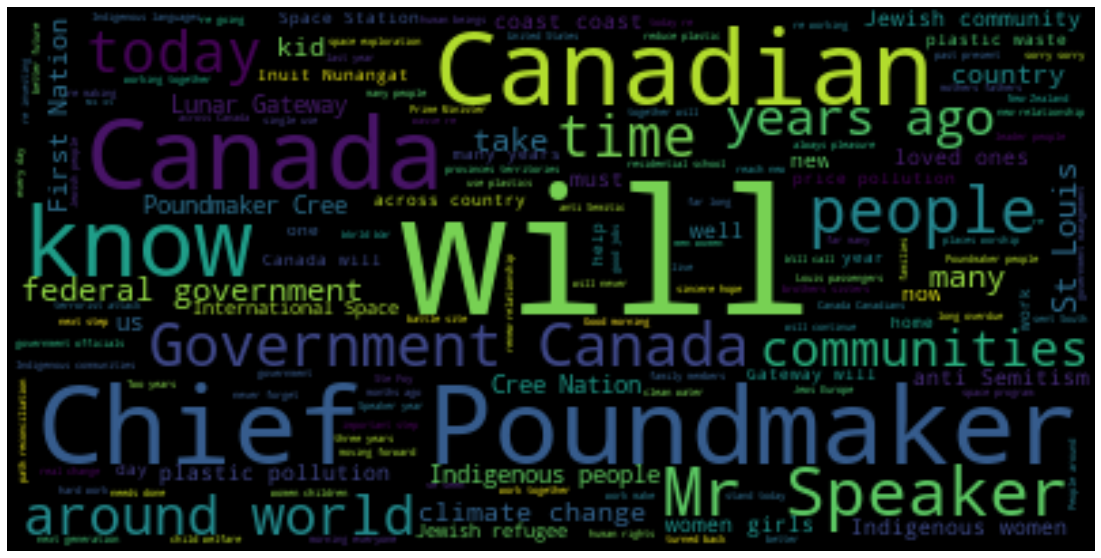

In [5]:
# Making wordcloud for all speeches
all_speeches = []

for speech in speeches.find():
    all_speeches.append(speech['details'])
    
all_text = ''.join(all_speeches)

wordcloud = WordCloud().generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 

Interesting wordcloud! Seems like many of his speeches are about firt nation politics and are heavily focused around the concept of today.

Next, I want to look at the distribution of his scores. 

Text(0.5, 1.0, 'Compound score distribution')

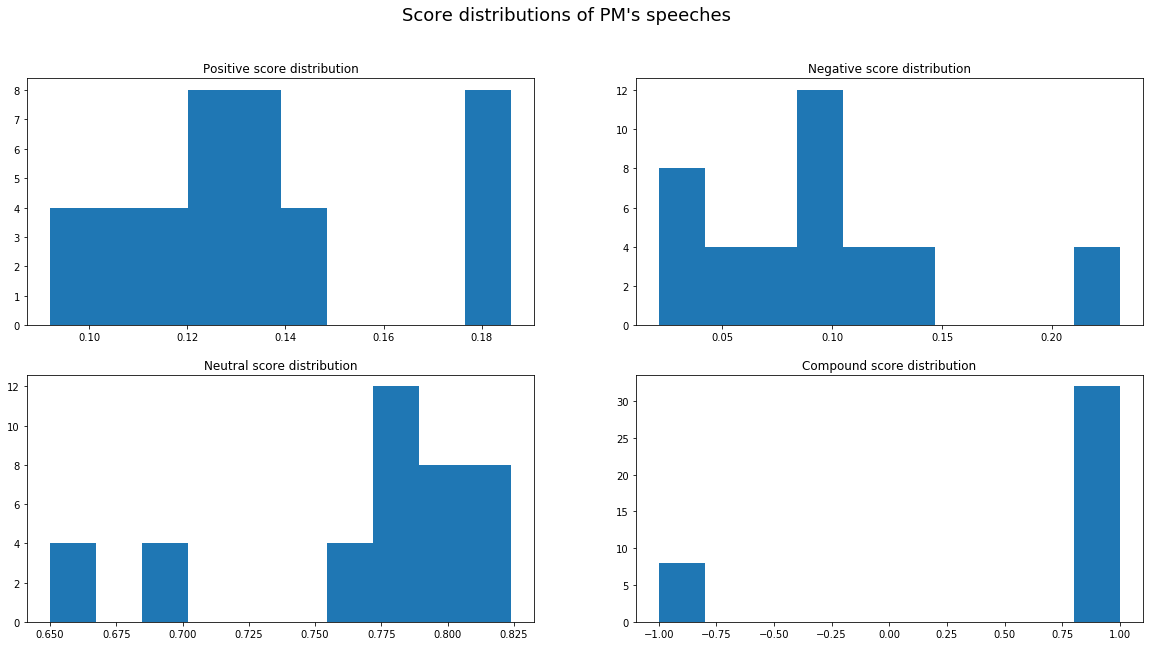

In [12]:
def score_list(score_type):
    score = []
    
    for speech in speeches.find():
        score.append(speech[score_type])
    
    return score

pos_scores = score_list('pos_score')
negative_scores = score_list('neg_score')
neutral_scores = score_list('neutral_score')
compound_scores = score_list('compound_score')

# Creating plots

fig, axs = plt.subplots(2,2)

fig.suptitle('Score distributions of PM\'s speeches', fontsize = 18)

axs[0,0].hist(pos_scores, bins = 10)
axs[0,0].set_title("Positive score distribution")

axs[0,1].hist(negative_scores, bins = 10)
axs[0,1].set_title("Negative score distribution")

axs[1,0].hist(neutral_scores, bins = 10)
axs[1,0].set_title("Neutral score distribution")

axs[1,1].hist(compound_scores, bins = 10)
axs[1,1].set_title("Compound score distribution")

Some initial analysis on these graphs:
* Very few of his speeches have an overt postive or negative sentiment. In fact, most or neutral
* Overall, there seems to be a higher average positive sentiment than negative sentiment
* The compound score is the most important graph. It is a normalized graph of the sum of all the sentiments. Therefore, it seems that overall, Trudeau has much more positive speeches than negative speeches

Let's do a time based analysis of his score changes over time

In [29]:
# Positive scores over time
positive_scores_ovrtime = []

for speech in speeches.find():
    positive_scores_ovrtime.append({
        'date' : datetime.strptime(speech['date'], '%B %d, %Y'),
        'positive_score' : speech['pos_score'],
        'negative_score' : speech['neg_score'],
        'neutral_score' : speech['neutral_score'],
        'compound_score' : speech['compound_score']
    })

# Converting list to dataframe
scores_time_df = pd.DataFrame(positive_scores_ovrtime, columns = ['date', 'positive_score', 'negative_score',
                                                                 'neutral_score', 'compound_score'])

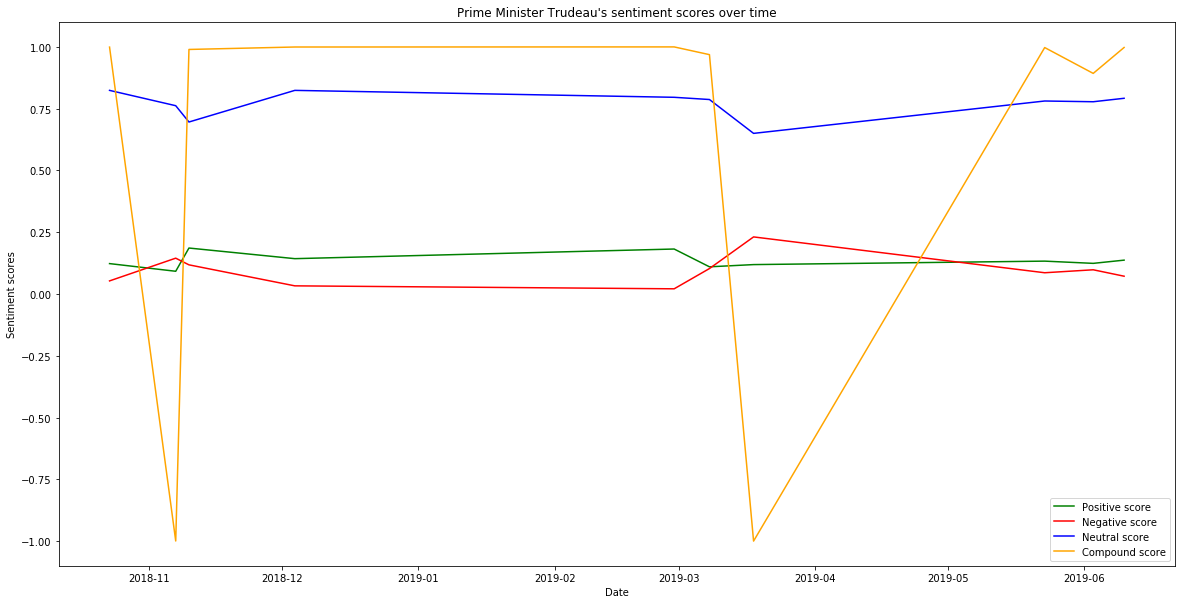

In [31]:
# Need to remove duplicates unfortunately
scores_time_df_nondup = scores_time_df.drop_duplicates(subset = 'date', keep = 'first')

# Making plot of scores over time
plt.plot(scores_time_df_nondup['date'], scores_time_df_nondup['positive_score'], color='g',
         label = 'Positive score')
plt.plot(scores_time_df_nondup['date'], scores_time_df_nondup['negative_score'], color='r',
        label = 'Negative score')
plt.plot(scores_time_df_nondup['date'], scores_time_df_nondup['neutral_score'], color='b',
        label = 'Neutral score')
plt.plot(scores_time_df_nondup['date'], scores_time_df_nondup['compound_score'], color='orange',
        label = 'Compound score')
plt.xlabel('Date')
plt.ylabel('Sentiment scores')
plt.title('Prime Minister Trudeau\'s sentiment scores over time')
plt.legend()
plt.show()

For the most part, Prime Minister Trudeau's sentiment has been overall positive. In fact, as we near the election, the instances of negative sentiment is going down. This is a trademark Trudeau move, as likes to campaign on optimism.

Also note that the compound scores tend to vary dependig on whether the negative or positive score is greater. We can use this to see that Trudeau usually had a positive sentiment.

Next, I want to create a histogram for the average length of Prime Minister Trudeau's speeches.

(array([4., 4., 0., 4., 4., 8., 8., 4., 0., 4.]),
 array([ 423. ,  648.5,  874. , 1099.5, 1325. , 1550.5, 1776. , 2001.5,
        2227. , 2452.5, 2678. ]),
 <a list of 10 Patch objects>)

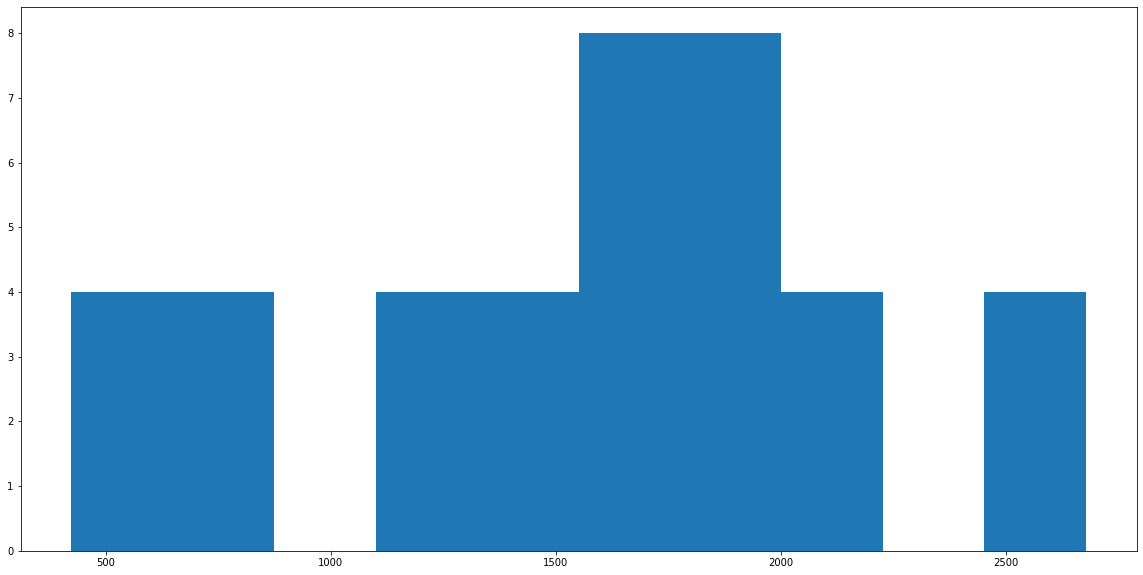

In [18]:
speech_lengths = []

for speech in all_speeches:
    speech_lengths.append(len(speech.split()))
    
plt.hist(speech_lengths, bins = 10)

Again, no surprise here. Most of the speeches are relatively short. After all, the best political speeches are the ones that are the shortest. 